# Hantera dina egna datasets

Vår värld är fylld av information, och genom att samla in den informationen får vi data.

Detta dokument visar en del lätthanterliga datafiler, och ställer några frågor som du kan svara på för att öva dig. Välj de datasets och frågor som intresserar. Du kan testa dig fram och lösa uppgifterna i detta dokument, eller skapa ett eget dokument där du läser in datafilerna.

In [2]:
# Dessa paket kommer du att behöva för att resten av dokumentet ska fungera.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Innehåll

I början av dokumentet hittar du en sammanfattning av de viktigaste funktionerna som vi använder när vi kodar med datasets. Dessa funktioner borde räcka till för att besvara frågorna som presenteras här, och de halvfärdiga lösningarna som inkluderats vid varje material fungerar samtidigt som exempel.

- [De viktigaste funktionerna för statistikbehandling](#funktioner)
- [Hantera datasets, pandas](#pandas)
- [Skapa grafer, matplotlib](#matplotlib)
- [Beräkningar, numpy](#numpy)

För varje dataset finns det några förslag på frågor som kan besvaras med hjälp av tabellen. De datasets som finns här är utvalda, "well-behaved" datasets, som inte kräver några specialkommandon för att läsa in.
- [Världens energiproduktion](#energi)
- [HSLs Passagerarantal](#HSL)
- [Evakuerade elever](#evac)
- [Väderstatistik](#väder)
- [Mässling och vaccin](#vaccin)
- [PISA-reultat](#PISA)

<a id="funktioner"></a>
## De viktigaste funktionerna för statistikbehandling 

<a id="pandas"></a>
### Hantera Datasets (paket: pandas)

**Paketet**

För att kunna behandla datasets behöver vi paketet pandas. Vi förkortar paketbeteckningen till pd, och vi kan kalla på paketets funktioner med **pd.funktionens_namn()**
````python
import pandas as pd
````

**Hämta in datasets**

Detta förutsätter att datafilen *dataset.csv* finns i samma mapp som din notebook. Funktionen **pd.read_csv()** omvandlar en csv-datafil till en *DataFrame* (tabellvariabel).  En DataFrame består av 

````python
datavariabel = pd.read_csv("dataset.csv")
````

**Kontrollera dataset**

.head-kommandot skriver ut de första raderna i tabellen.
````python
datavariabel.head()
````
**Välj ut en cell ur tabellen**

Vi vill välja ut det tabellvärde som ligger i den första raden och tredje kolumnen. Indexering i python börjar från noll, så den första raden har index 0 och den tredje kolumnen har index 2.
````python
datacell = datavariabel.iloc[0][2]
````

**Välj ut kolumner (lodräta) ur tabellen**
````python
years = datavariabel.Year  # Söker kolumnen "Year" ur tabellen och sparar den som variabeln years.

````

**Välj ut rader (vågräta) ur tabellen**

exempel: Tabellen innehåller en kolumn med rubriken *Entity*, och du vill välja ut de rader som innehåller "Finland", eller datatabellen innehåller en kolumn *Year* och du vill välja ut de rader med årtal mellan 2000 och 2005.

(Ett enkelt =-tecken innebär att vi definierar ett värde. Dubbla ==-tecken innebär att vi jämför/kontrollerar ett värde)
````python
dataFIN = datavariabel[datavariabel.Entity == "Finland"]
datadel = datavariabel[(datavariabel.Year >= 2000) & (datavariabel.Year <= 2005)]
    
````

<a id="matplotlib"></a>
### Skapa grafer (paket: matplotlib.pyplot)

**Paketet**

För att kunna rita grafer behöver vi paketet matplotlib.pyplot. Vi förkortar paketbeteckningen till plt, och vi kan kalla på paketets funktioner med **plt.funktionens_namn()**
````python
import matplotlib.pyplot as plt
````


**Definiera grafen**

Inled med kommandot fig = plt.figure() för att kunna bestämma grafens storlek bl.a. <br>
Avsluta med kommandot plt.show() för att visa grafen. Mellan dessa två kommandon kan du skriva kommandon som skapar och ändrar grafen.

````python
fig = plt.figure(figsize = (8,20))

...

plt.show()
````

**Skapa diagram**

Dessa funktioner kan användas för att skapa diagram över värden i en lista. Vissa kräver två listor (två koordinater). Då är det viktigt att listorna innehåller lika många värden.
````python
plt.hist(lista)                  # histogram
plt.bar(namnlista, vardelista)   # stapeldiagram
plt.plot(xlista, ylista)         # graf
plt.scatter(xlista, ylista)      # punkter
````


**Parametrar**

I varje diagramkommando kan man lägga till parametrar för att ändra det. Man kan skriva många parametrar i rad och ordningsföljden gör oftast ingen skillnad.

````python
plt.hist(lista, bins=25)                        # "bins=" används för att bestämma antalet staplar (10 är default).
plt.hist(lista, color='blue')                   # "color=" Ändrar histogrammets färg
plt.plot(xlista, ylista, label="grafens namn")  # "label=" Används för att namnge kurvan. Namnen kan visas med kommandot plt.legend()

````

**Tydlighet**

Dessa kommandon kan användas för att modifiera grafen

````python
plt.xlabel("x-axelns namn", fontsize=18)
plt.ylabel("y-axelns namn", fontsize=18)
plt.title("diagrammets titel", fontsize=20)
plt.xlim = (1000, 2000)       # begränsar grafen i x-led
plt.ylim = (1000, 2000)       # begränsar grafen i y-led
plt.legend()                  # lägger till en informationsruta som visar grafernas labels.

````

<a id="numpy"></a>
### Beräkningar (paket: numpy)

**Paketet**

För att kunna göra statistiska beräkningar behöver vi paketet numpy. Vi förkortar paketbeteckningen till np, och vi kan kalla på paketets funktioner med **np.funktionens_namn()**
````python
import numpy as np
````

**medeltal**

Vi har en lista med värden och vill beräkna medelvärdet av dessa värden.
````python
medeltal = np.average(lista)
````

**varians och standardavvikelse**

Vi har en lista med värden och vill beräkna varians eller standardavvikelse av dessa värden.
````python
varians = np.var(lista)
standardavvikelse = np.std(lista)
````


<a id="energi"></a>
### Världens energiproduktion

Här finns en lista på vilka typer av energi världen producerar (Källa: [OurWorldinData](https://ourworldindata.org/grapher/global-energy-consumption-source?country=~OWID_WRL)). Statistiken berättar om varje årtionde under åren 1800-1960 och fortsätter årsvis från 1965 till 2019.

Besvara följande frågor och skapa en graf (eller flera) som illustrerar dina svar:
1. Vilka tre energikällor står för den största delen av världens energiproduktion idag?
2. Hur stor del av världens energi kommer från fossila bränslen (kol, gas och olja) idag? Hur var det för 50 år sedan?

In [41]:
energi = pd.read_csv("global-energy-substitution.csv")
energi.tail()

,Year,Wind (TWh),Oil (TWh),Nuclear (TWh),Hydropower (TWh),Biomass (TWh),Other renewables (TWh),Biofuels (TWh),Solar (TWh),Coal (TWh),Gas (TWh)
67,2015,2104,50892,6516,9827,11111,1362,937,650,43844,34781
68,2016,2424,51920,6576,10092,11111,1378,970,825,43196,35589
69,2017,2852,52568,6596,10165,11111,1457,1012,1117,43360,36586
70,2018,3157,53181,6711,10368,11111,1529,1109,1448,44109,38517
71,2019,3540,53620,6923,10455,11111,1614,1143,1793,43849,39292


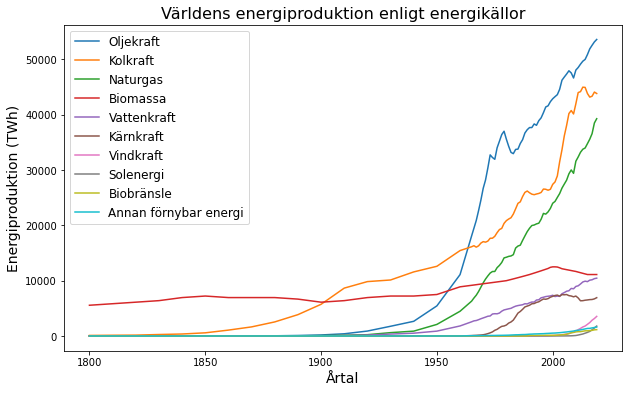

In [4]:
fig = plt.figure(figsize=(10,6))

plt.plot(energi["Year"], energi["Oil (TWh)"], label = "Fossila bränslen")
plt.plot(energi["Year"], energi["Coal (TWh)"], label = "Kolkraft")
plt.plot(energi["Year"], energi["Gas (TWh)"], label = "Naturgas")
plt.plot(energi["Year"], energi["Biomass (TWh)"], label = "Biomassa")
plt.plot(energi["Year"], energi["Hydropower (TWh)"], label = "Vattenkraft")
plt.plot(energi["Year"], energi["Nuclear (TWh)"], label = "Kärnkraft")
plt.plot(energi["Year"], energi["Wind (TWh)"], label = "Vindkraft")
plt.plot(energi["Year"], energi["Solar (TWh)"], label = "Solenergi")
plt.plot(energi["Year"], energi["Biofuels (TWh)"], label = "Biobränsle")
plt.plot(energi["Year"], energi["Other renewables (TWh)"], label = "Annan förnybar energi")

plt.title("Världens energiproduktion enligt energikällor", fontsize=16)
plt.xlabel("Årtal", fontsize=14)
plt.ylabel("Energiproduktion (TWh)",fontsize=14)

plt.legend(fontsize=12)
plt.show()

Vi ser att de tre största energikällorna idag är olja, kol och naturgas, med stor marginal. (I detta material räknas även olja som används för fordon och uppvärmning.) Vi ska se på deras andel av den totala energiproduktionen.

In [44]:
print(energi[energi.Year==2019])
print(energi[energi.Year==1969])

    Year  Wind (TWh)  Oil (TWh)  Nuclear (TWh)  Hydropower (TWh)  \
71  2019        3540      53620           6923             10455   

    Biomass (TWh)  Other renewables (TWh)  Biofuels (TWh)  Solar (TWh)  \
71          11111                    1614            1143         1793   

    Coal (TWh)  Gas (TWh)  
71       43849      39292  
    Year  Wind (TWh)  Oil (TWh)  Nuclear (TWh)  Hydropower (TWh)  \
21  1969           0      24577            172              3116   

    Biomass (TWh)  Other renewables (TWh)  Biofuels (TWh)  Solar (TWh)  \
21           9387                      65               0            0   

    Coal (TWh)  Gas (TWh)  
21       16799       8833  


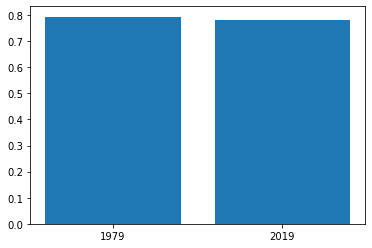

In [56]:
data1979 = energi[energi.Year == 1979]
data2019 = energi[energi.Year == 2019]

fossil1979 = data1979.iloc[0][2] + data1979.iloc[0][9] + data1979.iloc[0][10]
fossil2019 = data2019.iloc[0][2] + data2019.iloc[0][9] + data2019.iloc[0][10]

total1979 = np.sum(data1979.iloc[0][:])
total2019 = np.sum(data2019.iloc[0][:])

plt.bar(["1979", "2019"], [fossil1979/total1979, fossil2019/total2019])

plt.show()

<bound method NDFrame.describe of     Year  Wind (TWh)  Oil (TWh)  Nuclear (TWh)  Hydropower (TWh)  \
0   1800           0          0              0                 0   
1   1810           0          0              0                 0   
2   1820           0          0              0                 0   
3   1830           0          0              0                 0   
4   1840           0          0              0                 0   
..   ...         ...        ...            ...               ...   
67  2015        2104      50892           6516              9827   
68  2016        2424      51920           6576             10092   
69  2017        2852      52568           6596             10165   
70  2018        3157      53181           6711             10368   
71  2019        3540      53620           6923             10455   

    Biomass (TWh)  Other renewables (TWh)  Biofuels (TWh)  Solar (TWh)  \
0            5556                       0               0            0   
1

In [68]:
fossil=[]
a=0
b=0
for i in range(72):
    a= energi.iloc[i][2] + energi.iloc[i][9] + energi.iloc[i][10]
    b= energi.iloc[i][1] + energi.iloc[i][2] + energi.iloc[i][3] + energi.iloc[i][4] + energi.iloc[i][5] + energi.iloc[i][6] + energi.iloc[i][7] + energi.iloc[i][8] + energi.iloc[i][9] + energi.iloc[i][10]
    procent = 100*a/b
    fossil.append(procent)

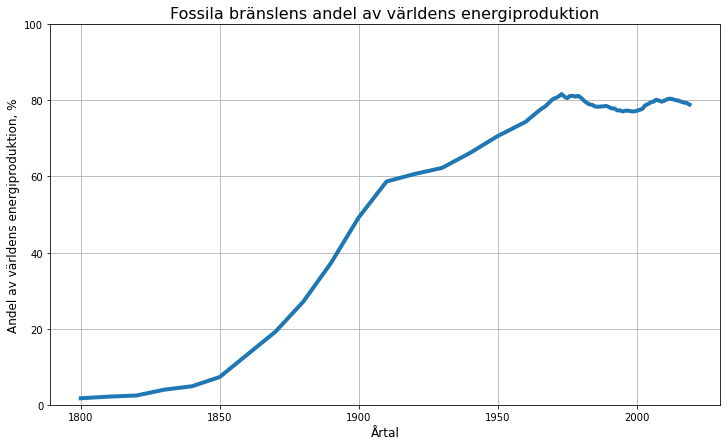

In [74]:
fig=plt.figure(figsize=(12,7))

plt.plot(energi.Year,fossil, linewidth = 4)

plt.title("Fossila bränslens andel av världens energiproduktion", fontsize=16)
plt.xlabel("Årtal",fontsize=12)
plt.ylabel("Andel av världens energiproduktion, %", fontsize=12)
plt.ylim(0,100)
plt.grid()

plt.show()

<a id="HSL"></a>
### HSLs Passagerarantal

Följande tabell innehåller information om antalet passagerare som stiger på vid var och en av HSLs (Helsingin Seudun Liikenne) stationer. Siffrorna visar antal passagerare per dag, som ett medeltal räknat över mars månad 2016. 

Källa: [Avoindata.fi](https://www.avoindata.fi/data/sv/dataset/hsl-n-nousijamaarat-pysakeittain)

In [5]:
HSL = pd.read_csv("HSLnousijamaarat.csv")

HSL.head(8)

,OBJECTID,Nousijamaara,Nimi,Lyhyt_tunn
0,1,56005,Helsingin rautatieasema,
1,2,32304,Pasilan asema,
2,3,2165,Ilmalan asema,
3,4,9477,Huopalahden asema,
4,5,2133,Valimon asema,
5,6,1905,Pitäjänmäen asema,
6,7,3080,Pohjois-Haagan asema,
7,8,4894,Kannelmäen asema,


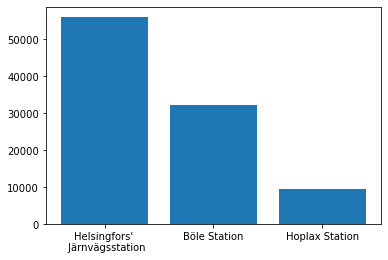

In [6]:
x = ("Helsingfors' \n Järnvägsstation", "Böle Station", "Hoplax Station")
y = (HSL.at[0,"Nousijamaara"], HSL.at[1,"Nousijamaara"], HSL.at[3,"Nousijamaara"])


plt.bar(x,y)
plt.show()

<a id="evac"></a>
### Evakuerade elever

Många av finlands elever studerar i tillfälliga baracker på grund av skolrenoveringar eller problem med inomhusluften. Här följer en tabell över elevantalet i grundskolorna i Finland, och andelen elever som studerar i tillfälliga byggnader.

<img src = Vaistotila.jpg width = 400>

In [7]:
baracker = pd.read_csv("opiskelijat_kunnittain.csv")
baracker.head(8)

,Kunta,Maakunta,Ei tietoa saatavilla,Oppilaita kunnassa,Oppilaita väistötiloissa 2018,Osuus 2018,"Oppilaita väistötiloissa 2019, arvio","Osuus 2019, arvio"
0,Akaa,Pirkanmaa,FALSE,1895.0,816,"0,431",816,"0,431"
1,Alajärvi,Etelä-Pohjanmaa,FALSE,1107.0,81,"0,073",81,"0,073"
2,Alavieska,Pohjois-Pohjanmaa,FALSE,329.0,0,"0,000",0,"0,000"
3,Alavus,Etelä-Pohjanmaa,FALSE,1300.0,0,"0,000",0,"0,000"
4,Asikkala,Päijät-Häme,FALSE,881.0,0,"0,000",0,"0,000"
5,Askola,Uusimaa,FALSE,648.0,112,"0,173",112,"0,173"
6,Aura,Varsinais-Suomi,FALSE,485.0,0,"0,000",0,"0,000"
7,Enonkoski,Etelä-Savo,FALSE,130.0,0,"0,000",0,"0,000"


<a id="väder"></a>
### Väderstatistik

Meteorologiska Institutet (Ilmatieteen Laitos) sparar stora mängder statistik om väderförhållanden, luftkvalitet och strålning. Här finns ett dataset som innehåller dagliga medel-, maximi- och minimitemperaturer från året 2020, mätt i Kaisaniemi, Helsingfors. Om du är intresserad av andra mätvärden eller orter kan du själv söka upp en fil [här](https://www.ilmatieteenlaitos.fi/havaintojen-lataus).

In [8]:
kaisa = pd.read_csv("daglig_temp_hki_2020.csv")

kaisa.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC),Ylin lämpötila (degC),Alin lämpötila (degC)
0,2020,1,1,00:00,UTC,2.3,4.0,-1.2
1,2020,1,2,00:00,UTC,4.3,5.6,2.6
2,2020,1,3,00:00,UTC,5.1,6.2,4.7
3,2020,1,4,00:00,UTC,2.5,5.4,2.1
4,2020,1,5,00:00,UTC,-1.0,2.2,-4.2


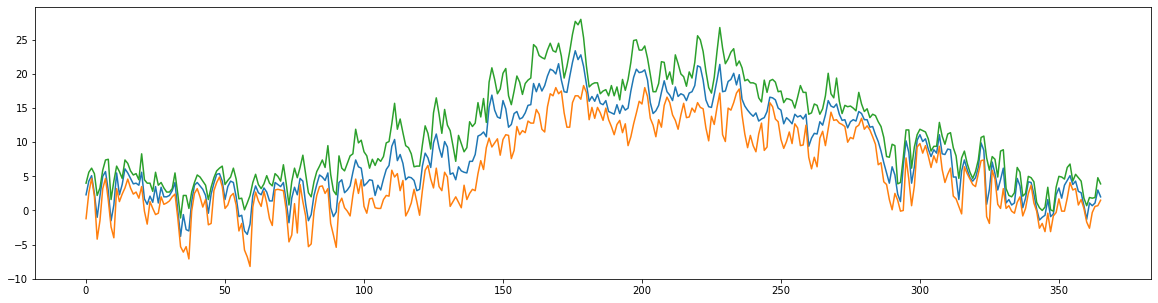

In [9]:
fig = plt.figure(figsize = (20, 5))

plt.plot(kaisa["Ilman lämpötila (degC)"])
plt.plot(kaisa["Alin lämpötila (degC)"])
plt.plot(kaisa["Ylin lämpötila (degC)"])

plt.show()

<a id="vaccin"></a>
### Mässling och vaccin

Här är ett annat dataset från [Ourworldindata](https://ourworldindata.org/search?q=measles), 

In [10]:
vaccin = pd.read_csv("measles-vaccine-coverage-worldwide-vs-measles-cases-worldwide.csv")
vaccin.head()

,Entity,Code,Year,Cases of measles per million population (WHO and UNPD 2017),MCV1 (% of one-year-olds immunized),"Total population (Gapminder, HYDE & UN)"
0,Afghanistan,AFG,1974,0.568090,NaN,12413000.0
1,Afghanistan,AFG,1975,37.013504,NaN,12689000.0
2,Afghanistan,AFG,1976,2.024922,NaN,12943000.0
3,Afghanistan,AFG,1977,2155.953400,NaN,13171000.0
4,Afghanistan,AFG,1978,3321.045400,NaN,13341000.0


In [79]:
old = vaccin[vaccin.Year<=1974 & vaccin.Entity=="World"]
old.head(120)

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [11]:
vaccinworld = vaccin[vaccin.Entity=="World"]

vaccinworld.head()

,Entity,Code,Year,Cases of measles per million population (WHO and UNPD 2017),MCV1 (% of one-year-olds immunized),"Total population (Gapminder, HYDE & UN)"
46545,World,OWID_WRL,1980,944.60339,16.0,4.458003e+09
46546,World,OWID_WRL,1981,976.25043,19.0,4.536997e+09
46547,World,OWID_WRL,1982,885.51624,20.0,4.617387e+09
46548,World,OWID_WRL,1983,812.48938,37.0,4.699569e+09
46549,World,OWID_WRL,1984,685.77496,41.0,4.784012e+09


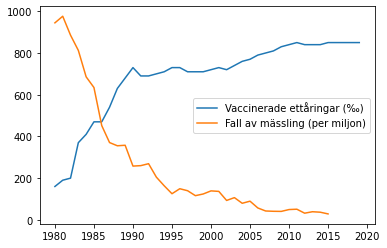

In [32]:
plt.plot(vaccinworld["Year"], 10*vaccinworld["MCV1 (% of one-year-olds immunized)"], label = "Vaccinerade ettåringar (‰)")
plt.plot(vaccinworld["Year"], vaccinworld["Cases of measles per million population (WHO and UNPD 2017)"], label="Fall av mässling (per miljon)")
plt.legend()
plt.show()

<a id="PISA"></a>
### PISA-resultat

Ytterligare ett dataset från [Ourworldindata](https://ourworldindata.org/search?q=pisa)

In [37]:
pisa = pd.read_csv("PISA_2000-2012.csv")
pisa.head(8)

,Entity,Code,Year,OECD PISA education score (PISA (2015))
0,Albania,ALB,2000,369
1,Albania,ALB,2009,384
2,Albania,ALB,2012,395
3,Argentina,ARG,2000,401
4,Argentina,ARG,2006,382
5,Argentina,ARG,2009,396
6,Argentina,ARG,2012,397
7,Austria,AUT,2000,514


In [38]:
scores = pisa["OECD PISA education score (PISA (2015))"]
print(np.average(scores))

471.9391634980989


<BarContainer object of 5 artists>

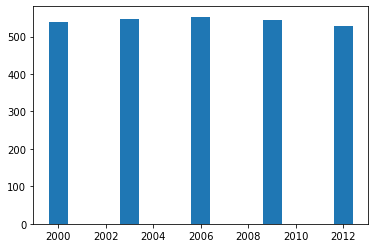

In [39]:
pisafin = pisa[pisa.Code=="FIN"]
plt.bar(pisafin["Year"],pisafin["OECD PISA education score (PISA (2015))"])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().